In [16]:
# import the usual suspects
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# import the class for loading the main fights data set
from cleanser import *

In [18]:
cleanser = RawFightsCleanser()
fights = cleanser.load_and_cleanse('raw_total_fight_data.csv', sep=';')

In [19]:
# Just curious, look at Royce Gracie's fights

In [20]:
fights[(fights.r_fighter == 'Royce Gracie') | (fights.b_fighter == 'Royce Gracie')][['r_fighter', 'b_fighter', 'winner', 'loser', 'win_by']]

,r_fighter,b_fighter,winner,loser,win_by
4590,Matt Hughes,Royce Gracie,Matt Hughes,Royce Gracie,KO/TKO
5099,Ken Shamrock,Royce Gracie,None,None,Other
5107,Royce Gracie,Dan Severn,Royce Gracie,Dan Severn,Submission
5109,Royce Gracie,Keith Hackney,Royce Gracie,Keith Hackney,Submission
5113,Royce Gracie,Ron van Clief,Royce Gracie,Ron van Clief,Submission
5117,Royce Gracie,Kimo Leopoldo,Royce Gracie,Kimo Leopoldo,Submission
5121,Royce Gracie,Patrick Smith,Royce Gracie,Patrick Smith,KO/TKO
5122,Royce Gracie,Remco Pardoel,Royce Gracie,Remco Pardoel,Submission
5124,Royce Gracie,Jason DeLucia,Royce Gracie,Jason DeLucia,Submission
5128,Royce Gracie,Minoki Ichihara,Royce Gracie,Minoki Ichihara,Submission


In [21]:
# just curious - how many fights include Gracies?
is_gracie = fights.apply(lambda row: 'gracie' in row.r_fighter.lower() or 'gracie' in row.b_fighter.lower(), axis=1)
fights[is_gracie][['r_fighter', 'b_fighter', 'winner', 'loser']]

,r_fighter,b_fighter,winner,loser
177,Alex Caceres,Kron Gracie,Kron Gracie,Alex Caceres
2818,Tim Kennedy,Roger Gracie,Tim Kennedy,Roger Gracie
3816,Matt Hughes,Renzo Gracie,Matt Hughes,Renzo Gracie
3875,Joey Beltran,Rolles Gracie,Joey Beltran,Rolles Gracie
4590,Matt Hughes,Royce Gracie,Matt Hughes,Royce Gracie
5099,Ken Shamrock,Royce Gracie,None,None
5107,Royce Gracie,Dan Severn,Royce Gracie,Dan Severn
5109,Royce Gracie,Keith Hackney,Royce Gracie,Keith Hackney
5113,Royce Gracie,Ron van Clief,Royce Gracie,Ron van Clief
5117,Royce Gracie,Kimo Leopoldo,Royce Gracie,Kimo Leopoldo


In [22]:
# Let's write functions to get the fights for any given fighter, and their numeric record.

In [23]:
def get_fights_for_fighter(fighter_name, fights_df = fights):
    return fights_df[(fights_df.r_fighter == fighter_name) | (fights_df.b_fighter == fighter_name)]

In [34]:
def get_record_summary(fighter_name, fights_df = fights):
    #record = get_record(fighter_name, fights_df)
    summary = {}
    summary['wins'] = (fights_df['winner'] == fighter_name).sum()
    summary['losses'] = (fights_df['winner'] == fighter_name).sum()
    summary['losses'] = (fights_df['loser'] == fighter_name).sum()
    summary['draws'] = (((fights_df['r_fighter'] == fighter_name) | (fights_df['b_fighter'] == fighter_name) ) & (fights_df['winner'] == 'None')).sum()
    summary['win loss ratio'] = summary ['wins'] / (summary['wins'] + summary['losses'])
    
    return summary

In [35]:
get_fights_for_fighter('Royce Gracie')[['r_fighter', 'b_fighter', 'winner', 'loser', 'win_by']]

,r_fighter,b_fighter,winner,loser,win_by
4590,Matt Hughes,Royce Gracie,Matt Hughes,Royce Gracie,KO/TKO
5099,Ken Shamrock,Royce Gracie,None,None,Other
5107,Royce Gracie,Dan Severn,Royce Gracie,Dan Severn,Submission
5109,Royce Gracie,Keith Hackney,Royce Gracie,Keith Hackney,Submission
5113,Royce Gracie,Ron van Clief,Royce Gracie,Ron van Clief,Submission
5117,Royce Gracie,Kimo Leopoldo,Royce Gracie,Kimo Leopoldo,Submission
5121,Royce Gracie,Patrick Smith,Royce Gracie,Patrick Smith,KO/TKO
5122,Royce Gracie,Remco Pardoel,Royce Gracie,Remco Pardoel,Submission
5124,Royce Gracie,Jason DeLucia,Royce Gracie,Jason DeLucia,Submission
5128,Royce Gracie,Minoki Ichihara,Royce Gracie,Minoki Ichihara,Submission


In [36]:
print(get_record_summary('Royce Gracie'))

{'wins': 11, 'losses': 1, 'draws': 1, 'win loss ratio': 0.9166666666666666}


In [37]:
print(get_record_summary('Royce Gracie', fights))

{'wins': 11, 'losses': 1, 'draws': 1, 'win loss ratio': 0.9166666666666666}


Matt Hughes beat Royce Gracie.  And he is also one of the few fighters famous enough for me to have heard of.  Let's look at his record.

In [38]:
print(get_record_summary('Matt Hughes'))

{'wins': 18, 'losses': 7, 'draws': 0, 'win loss ratio': 0.72}


In [39]:
get_fights_for_fighter('Matt Hughes')[['winner', 'win_by', 'loser']]

,winner,win_by,loser
3441,Josh Koscheck,KO/TKO,Matt Hughes
3667,BJ Penn,KO/TKO,Matt Hughes
3742,Matt Hughes,Submission,Ricardo Almeida
3816,Matt Hughes,KO/TKO,Renzo Gracie
4029,Matt Hughes,Decision - Unanimous,Matt Serra
4231,Thiago Alves,KO/TKO,Matt Hughes
4313,Georges St-Pierre,Submission,Matt Hughes
4461,Matt Hughes,Decision - Unanimous,Chris Lytle
4502,Georges St-Pierre,KO/TKO,Matt Hughes
4536,Matt Hughes,KO/TKO,BJ Penn


Another famous UFC figher is George St. Pierre.  Let's look at his record.

In [40]:
get_fights_for_fighter('Georges St-Pierre')[['winner', 'win_by', 'loser']]

,winner,win_by,loser
793,Georges St-Pierre,Submission,Michael Bisping
2660,Georges St-Pierre,Decision - Split,Johny Hendricks
2923,Georges St-Pierre,Decision - Unanimous,Nick Diaz
3047,Georges St-Pierre,Decision - Unanimous,Carlos Condit
3552,Georges St-Pierre,Decision - Unanimous,Jake Shields
3644,Georges St-Pierre,Decision - Unanimous,Josh Koscheck
3835,Georges St-Pierre,Decision - Unanimous,Dan Hardy
3997,Georges St-Pierre,Decision - Unanimous,Thiago Alves
4092,Georges St-Pierre,KO/TKO,BJ Penn
4191,Georges St-Pierre,Decision - Unanimous,Jon Fitch


In [41]:
# I wonder who has the "best" record.  It is hard to define who has the best record, but I'll start by sorting them by number of wins.
all_fighters = set(fights.r_fighter).union(set(fights.b_fighter))
len(all_fighters)

1915

In [42]:
class RecordSummary:
    def __init__(self, name, wins, losses, ties):
        self.name = name
        self.wins = wins
        self.losses = losses
        self.ties = ties
        
    def __str__(self):
        return '{ name: ' + self.name + ', ' + str(self.wins) + ', ' + str(self.losses) + ', ' + str(self.ties) + ', ' + str(self.wins / (self.wins + self.losses)) + '}'
    
    def __repr__(self):
        return self.__str__()
    
    def __lt__(self, other):
        return (self.wins < other.wins)
    
    

In [43]:
all_summaries = []
for fighter in all_fighters:
    #print(fighter, ':  ', get_record_summary(fighter))
    m = get_record_summary(fighter)
    rs = RecordSummary(fighter, m['wins'], m['losses'], m['draws'])
    all_summaries.append(rs)

C:\Users\paulj_1e1uzlz\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in longlong_scalars
  


In [44]:
all_summaries.sort()
all_summaries = all_summaries[::-1]
all_summaries[:20]

[{ name: Donald Cerrone, 23, 9, 0, 0.71875},
 { name: Georges St-Pierre, 20, 2, 0, 0.9090909090909091},
 { name: Michael Bisping, 20, 9, 0, 0.6896551724137931},
 { name: Demian Maia, 20, 9, 0, 0.6896551724137931},
 { name: Jim Miller, 19, 12, 1, 0.6129032258064516},
 { name: Diego Sanchez, 18, 11, 0, 0.6206896551724138},
 { name: Matt Hughes, 18, 7, 0, 0.72},
 { name: Rafael Dos Anjos, 18, 9, 0, 0.6666666666666666},
 { name: Jon Jones, 18, 1, 1, 0.9473684210526315},
 { name: Frankie Edgar, 17, 6, 1, 0.7391304347826086},
 { name: Anderson Silva, 17, 6, 1, 0.7391304347826086},
 { name: Dustin Poirier, 17, 4, 1, 0.8095238095238095},
 { name: Randy Couture, 16, 8, 0, 0.6666666666666666},
 { name: Frank Mir, 16, 11, 0, 0.5925925925925926},
 { name: Andrei Arlovski, 16, 12, 1, 0.5714285714285714},
 { name: Chuck Liddell, 16, 7, 0, 0.6956521739130435},
 { name: Max Holloway, 16, 4, 0, 0.8},
 { name: Lyoto Machida, 16, 8, 0, 0.6666666666666666},
 { name: Gleison Tibau, 16, 12, 0, 0.57142857142

So the above are the 20 people with the most wins.  Of those, notice George St. Pierre and Jon Jones having very few losses.

In [45]:
# Let's do some exploration of some attributes

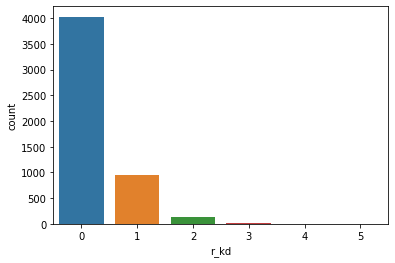

In [46]:
sns.countplot(data=fights, x='r_kd')

The most basic question is, if we want to predict if Red or Blue won, what is the percentage of each winning

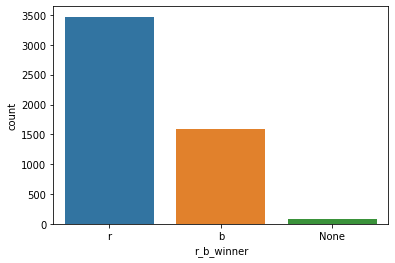

In [47]:
sns.countplot(fights.r_b_winner)

In [48]:
# put numerically
fights.r_b_winner.value_counts()

r       3470
b       1591
None      83
Name: r_b_winner, dtype: int64

In [49]:
fights.r_b_winner.value_counts() / fights.shape[0]

r       0.674572
b       0.309292
None    0.016135
Name: r_b_winner, dtype: float64

So the "red" fighter wins about 67% of the time.  From what I understand, the Red fighter is supposed to be the favored one, so whoever picks them does an OK job.
This also means that anything we do to predict the winner will have to have a higher accuracy rate that 0.674572.  Otherwise, we would just predict "red wins" every time.

Now go back to the idea of how fights end and investigate what is more effective.
First, let's look at how fights ended.

In [50]:
fights.win_by.value_counts()

Decision - Unanimous       1737
KO/TKO                     1647
Submission                 1083
Decision - Split            486
TKO - Doctor's Stoppage      70
Decision - Majority          56
Overturned                   35
DQ                           15
Could Not Continue           13
Other                         2
Name: win_by, dtype: int64

As I said in the introductory page, when there is a "submission", the losing figher has "tapped" and admitted defeat, typically due to a joint lock or a choke.  Most of the other values here, such as Decision or TKO/KO, are due to the fight being decided by strikes, not grappling.  There could be a few TKO/KO fights where someone is choked unconcious, but otherwise, most fights not labeled "submission" were ended by striking and not grappling.

I wonder if the rate of winning by submission has changed over time.  Maybe the strategy has changed since the early days where Royce Gracie shocked so many people by submitting them with a lesser know style.
Let's graph the number of fights that have ended by submission as a function of time

In [56]:
fights['was_sub'] = fights.win_by == 'Submission'

In [57]:
fights['was_sub'] = fights.win_by.apply(lambda x: 1 if x == 'Submission' else 0)

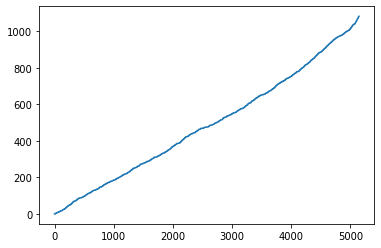

In [58]:
plt.plot([x for x in range(fights.shape[0])], fights.was_sub.cumsum())

The slope of the ratio between submissions and total fights has remained relatively constant.

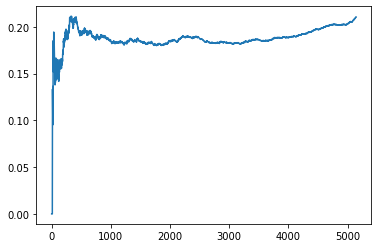

In [59]:
# Another way to look at it.  Plot the current ratio of submissions to all fights over time.
i = [x for x in range(fights.shape[0])]
plt.plot(i, fights.was_sub.cumsum() / i)

Again, it quickly converges to a value in the range of .2 and stays relatively constant.  So approximately one fifth of UFC fights have ended in a submission.  This means that the other four fifths are presumably being decided by strikes, not submissions.
While this might not be enough information to determine a training strategy for a potential fighter, from this it looks like someone should not train exclusively in grappling (even though I currently have been taking Brazillian Jiu Jitsu and think it can be very effective for self defense).

The other data set has a little bit more detail on the finish.

In [63]:
ufc = pd.read_csv('ufc-master.csv')

In [64]:
ufc.shape

(4292, 110)

In [65]:
ufc.finish.value_counts()

U-DEC         1543
KO/TKO        1291
SUB            758
S-DEC          435
M-DEC           26
DQ              12
Overturned       2
Name: finish, dtype: int64

In [66]:
(ufc.finish == 'SUB').sum()/ ufc.finish.value_counts().sum()

0.18637816572412097

In [67]:
So in this data set, about 18.6% are ending in a submission, similar to the other one.

SyntaxError: invalid syntax (<ipython-input-67-0a8a3e22b2ff>, line 1)

In [68]:
This data also has a finish_details column, although many of the values are blank.

SyntaxError: invalid syntax (<ipython-input-68-f23b73367a73>, line 1)

In [69]:
ufc.finish_details.value_counts()

Punch                 485
Punches               429
Rear Naked Choke      310
Guillotine Choke      143
Kick                  113
Armbar                 88
Knee                   64
Arm Triangle           58
Elbows                 56
Triangle Choke         45
Elbow                  27
D'Arce Choke           24
Kimura                 20
Flying Knee            19
Knees                  16
Other - Choke          14
Anaconda Choke         14
Kneebar                12
Heel Hook              10
Slam                    6
Spinning Back Kick      6
Spinning Back Fist      6
Neck Crank              5
Other - Lock            5
North-South Choke       4
Injury                  3
Kicks                   2
Omoplata                2
Ankle Lock              1
Peruvian Necktie        1
Keylock                 1
Name: finish_details, dtype: int64

Let's break it down for submissions and non submissions.

In [70]:
subs = ufc[ufc.finish == 'SUB']
not_sub = ufc[ufc.finish != 'SUB']

In [71]:
subs.finish_details.value_counts()

Rear Naked Choke     309
Guillotine Choke     143
Armbar                88
Arm Triangle          58
Triangle Choke        45
D'Arce Choke          23
Kimura                20
Other - Choke         14
Anaconda Choke        14
Kneebar               12
Heel Hook             10
Other - Lock           5
Neck Crank             5
North-South Choke      4
Injury                 3
Omoplata               2
Peruvian Necktie       1
Keylock                1
Ankle Lock             1
Name: finish_details, dtype: int64

So if you are going to submit somebody, the rear naked choke seems to be your most likely option.
If you are not familiar with grappling or jiu jitsu, the rear naked choke is where you choke somebody from behind (hence the "rear").  The "naked" comes from the fact that the traditional Japanese Jiu Jitsu uniform, called a "gi", it not necessary.
A guillotine choke is difficult to describe, but it is sort of a front headlock choke.
One of the most popular chokes in Jiu Jitsu, the regular Triangle Choke, is fouth on the list, which is a little surprising.  Also, I notice that heel hooks, which are popular in Brazillian Jiu Jitsu competition right now, are low on the list.
One of my favorite moves, the Omoplata, has finished someone off 2 times in the UFC.  It looks like a great move, but maybe I should have a backup.

Let's look at fights that ended due to striking.

In [72]:
not_sub.finish_details.value_counts()

Punch                 485
Punches               429
Kick                  113
Knee                   64
Elbows                 56
Elbow                  27
Flying Knee            19
Knees                  16
Slam                    6
Spinning Back Fist      6
Spinning Back Kick      6
Kicks                   2
Rear Naked Choke        1
D'Arce Choke            1
Name: finish_details, dtype: int64

For the sake of this, let's combine things like "Punch" and "Punches" into one category.

In [73]:
not_sub['finish_details'] = not_sub['finish_details'].apply(lambda s: 'Punches' if s == 'Punch' else s)
not_sub['finish_details'] = not_sub['finish_details'].apply(lambda s: 'Kicks' if s == 'Kick' else s)
not_sub['finish_details'] = not_sub['finish_details'].apply(lambda s: 'Elbows' if s == 'Elbow' else s)
not_sub['finish_details'] = not_sub['finish_details'].apply(lambda s: 'Knees' if s == 'Knee' else s)
not_sub['finish_details'] = not_sub['finish_details'].apply(lambda s: 'Knees' if s == 'Flying Knee' else s)

C:\Users\paulj_1e1uzlz\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\paulj_1e1uzlz\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\paulj_1e1uzlz\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [74]:
not_sub.finish_details.value_counts()

Punches               914
Kicks                 115
Knees                  99
Elbows                 83
Slam                    6
Spinning Back Fist      6
Spinning Back Kick      6
Rear Naked Choke        1
D'Arce Choke            1
Name: finish_details, dtype: int64

Based on this, punches seems the most common way to end the fight.  This does not capture all the things that went into it before that could have gotten the opponent tired and battered.  So it might be premature to say that the flying kicks of the kung fu movies is a bunch of hooie hah.  But, at least as far as finishin the fight, if I were training to be a UFC fighter I would focus on punches more than kicks.